PROCESSING KENYA ROAD ACCIDENT DATASET, 2017

In [9]:
## importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [11]:
## Loading Datset

data = pd.read_excel('DATA/Accidents in Kenya 2017.xlsx')

Inspecting the Dataset 

In [24]:
##Inspecting first 5 and last rows
data.head()


,TIME 24 HOURS,BASE/SUB BASE,COUNTY,ROAD,PLACE,MV INVOLVED,BRIEF ACCIDENT DETAILS,NAME OF VICTIM,GENDER,AGE,CAUSE CODE,VICTIM,NO.,Date DD/MM/YYYY,Unnamed: 14
0,745,KISUMU,KISUMU,NAIROBI-BUSIA,KASAGAM FLY OVER,KBS 163T/ZD 9531 AXIOR TRAILER,THE VEHICLE LOST CONTROL AND HIT BARRIER LANDI...,UNKNOWN,F,A,29.0,PASSENGER,1.0,2017-11-06,2017-06-11
1,1430,NAROK,NAROK,NAROK-MAU,NAROK TOWN,KBS 518A HONDA CRV,THE VEHICLE KNOCKED DOWN THE VICTIM,UNKNOWN,M,80,68.0,PEDESTRIAN,1.0,2017-11-06,NaT
2,1515,LONDIANI,KERICHO,KERICHO-NAKURU,JUBERT AREA,KTCB 472K JOHN DEER,"THE VEHICLE LOST CONTROL,VEERING OFF THE ROAD ...",UNKNOWN,M,25,26.0,DRIVER,1.0,2017-11-06,NaT
3,1600,KIMILILI,BUNGOMA,BOKOLI-KIMILILI,BITUYU AREA,KBW 374M TOYOTA TOWNACE,THE VEHICLE KNOCKED DOWN THE VICTIM,UNKNOWN,M,31,7.0,PEDESTRIAN,1.0,2017-11-06,NaT
4,1747,NAKURU,NAKURU,PIPELINE ELEMENTAITA,PIPELINE AREA,KMDQ 433R DAYAN & KAR 843W,THE VEHICLE HIT THE MOTOR CYCLE,UNKNOWN,M,23,29.0,M/CYCLIST,1.0,2017-11-06,NaT


In [26]:
data.tail()

,TIME 24 HOURS,BASE/SUB BASE,COUNTY,ROAD,PLACE,MV INVOLVED,BRIEF ACCIDENT DETAILS,NAME OF VICTIM,GENDER,AGE,CAUSE CODE,VICTIM,NO.,Date DD/MM/YYYY,Unnamed: 14
735,1730,KURIA,MIGORI,NTIMARU-KEHANCHA,TARANGANYA SHOPPING CENTRE,GK B 529 ISUZU DMAX & M/J/PED,THE VEHICLE KNOCKED DOWN A PEDESTRIAN,CHARLES MUNATI,M,J,36.0,PEDESTRIAN,1.0,2017-02-22,NaT
736,1930,SAGANA,KIRINYAGA,KENOL-MAKUTANO,WACHORO AREA,KBU 591M/ZF 5724 SCANIA & KMEA 508C TIGER,THE CYCLE HIT THE STATIONARY VEHICLE,UNKNOWN,M,A,37.0,RIDER AND P/PASSENGER,2.0,2017-02-22,NaT
737,2145,DTEO KASARANI,NAIROBI,THIKA RD,CAR WASH AREA,KCH 357W T/IST & M/A/PED,THE VEHICLE KNOCKED DOWN A PEDESTIRAN,COLLINS KIARIE,M,20,98.0,PEDESTRIAN,1.0,2017-02-22,NaT
738,2039,KANGUNDO,MAKUENI,NAIROBI-KANGUNDO,MAKENZIE AREA,KCC 374L HINO MINIBUS & KMCG 188U SKYGO,THE VEHICLE COLLIDED HEAD ON WITH THE M/CYCLE,BENARD MUTUNGA,M,36,82.0,RIDER,1.0,2017-02-22,NaT
739,139,DTEO DAGORETI,NAIROBI,WAIYAKI WAY,KANGEMI STAGE,KBR 741X HONDA CRV & M/A/PED,THE VEHICLE KNOCKED DOWN A PEDESTRIAN,UNKNOWN,M,A,98.0,PEDESTRIAN,1.0,2017-02-22,NaT


In [28]:
## Summary info of dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   TIME 24 HOURS           737 non-null    object        
 1   BASE/SUB BASE           738 non-null    object        
 2   COUNTY                  739 non-null    object        
 3   ROAD                    737 non-null    object        
 4   PLACE                   734 non-null    object        
 5   MV INVOLVED             740 non-null    object        
 6   BRIEF ACCIDENT DETAILS  740 non-null    object        
 7   NAME OF VICTIM          740 non-null    object        
 8   GENDER                  740 non-null    object        
 9   AGE                     739 non-null    object        
 10  CAUSE CODE              718 non-null    float64       
 11  VICTIM                  740 non-null    object        
 12  NO.                     736 non-null    float64   

In [30]:
## shape of dataset

data.shape

(740, 15)

In [32]:
## Statistical Summary

data.describe()

,CAUSE CODE,NO.,Date DD/MM/YYYY,Unnamed: 14
count,718.000000,736.000000,740,1
mean,47.682451,1.199728,2017-07-03 11:11:21.081081088,2017-06-11 00:00:00
min,4.000000,1.000000,2017-02-22 00:00:00,2017-06-11 00:00:00
25%,19.250000,1.000000,2017-05-12 00:00:00,2017-06-11 00:00:00
50%,37.000000,1.000000,2017-07-16 00:00:00,2017-06-11 00:00:00
75%,76.000000,1.000000,2017-08-20 00:00:00,2017-06-11 00:00:00
max,99.000000,18.000000,2017-11-06 00:00:00,2017-06-11 00:00:00
std,33.091682,1.078951,NaN,NaN


CLEANING AND PREPROCESSING DATASET

1. Identifying and cleaning missing and null values

In [36]:
## Checking for null values

data.isna()

,TIME 24 HOURS,BASE/SUB BASE,COUNTY,ROAD,PLACE,MV INVOLVED,BRIEF ACCIDENT DETAILS,NAME OF VICTIM,GENDER,AGE,CAUSE CODE,VICTIM,NO.,Date DD/MM/YYYY,Unnamed: 14
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
736,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
737,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
738,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [38]:
data.isna().sum()

TIME 24 HOURS               3
BASE/SUB BASE               2
COUNTY                      1
ROAD                        3
PLACE                       6
MV INVOLVED                 0
BRIEF ACCIDENT DETAILS      0
NAME OF VICTIM              0
GENDER                      0
AGE                         1
CAUSE CODE                 22
VICTIM                      0
NO.                         4
Date DD/MM/YYYY             0
Unnamed: 14               739
dtype: int64

In [40]:
## Dropping Column with only 1 value

data.drop( columns = ['Unnamed: 14'], inplace = True)

In [42]:
data

,TIME 24 HOURS,BASE/SUB BASE,COUNTY,ROAD,PLACE,MV INVOLVED,BRIEF ACCIDENT DETAILS,NAME OF VICTIM,GENDER,AGE,CAUSE CODE,VICTIM,NO.,Date DD/MM/YYYY
0,745,KISUMU,KISUMU,NAIROBI-BUSIA,KASAGAM FLY OVER,KBS 163T/ZD 9531 AXIOR TRAILER,THE VEHICLE LOST CONTROL AND HIT BARRIER LANDI...,UNKNOWN,F,A,29.0,PASSENGER,1.0,2017-11-06
1,1430,NAROK,NAROK,NAROK-MAU,NAROK TOWN,KBS 518A HONDA CRV,THE VEHICLE KNOCKED DOWN THE VICTIM,UNKNOWN,M,80,68.0,PEDESTRIAN,1.0,2017-11-06
2,1515,LONDIANI,KERICHO,KERICHO-NAKURU,JUBERT AREA,KTCB 472K JOHN DEER,"THE VEHICLE LOST CONTROL,VEERING OFF THE ROAD ...",UNKNOWN,M,25,26.0,DRIVER,1.0,2017-11-06
3,1600,KIMILILI,BUNGOMA,BOKOLI-KIMILILI,BITUYU AREA,KBW 374M TOYOTA TOWNACE,THE VEHICLE KNOCKED DOWN THE VICTIM,UNKNOWN,M,31,7.0,PEDESTRIAN,1.0,2017-11-06
4,1747,NAKURU,NAKURU,PIPELINE ELEMENTAITA,PIPELINE AREA,KMDQ 433R DAYAN & KAR 843W,THE VEHICLE HIT THE MOTOR CYCLE,UNKNOWN,M,23,29.0,M/CYCLIST,1.0,2017-11-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,1730,KURIA,MIGORI,NTIMARU-KEHANCHA,TARANGANYA SHOPPING CENTRE,GK B 529 ISUZU DMAX & M/J/PED,THE VEHICLE KNOCKED DOWN A PEDESTRIAN,CHARLES MUNATI,M,J,36.0,PEDESTRIAN,1.0,2017-02-22
736,1930,SAGANA,KIRINYAGA,KENOL-MAKUTANO,WACHORO AREA,KBU 591M/ZF 5724 SCANIA & KMEA 508C TIGER,THE CYCLE HIT THE STATIONARY VEHICLE,UNKNOWN,M,A,37.0,RIDER AND P/PASSENGER,2.0,2017-02-22
737,2145,DTEO KASARANI,NAIROBI,THIKA RD,CAR WASH AREA,KCH 357W T/IST & M/A/PED,THE VEHICLE KNOCKED DOWN A PEDESTIRAN,COLLINS KIARIE,M,20,98.0,PEDESTRIAN,1.0,2017-02-22
738,2039,KANGUNDO,MAKUENI,NAIROBI-KANGUNDO,MAKENZIE AREA,KCC 374L HINO MINIBUS & KMCG 188U SKYGO,THE VEHICLE COLLIDED HEAD ON WITH THE M/CYCLE,BENARD MUTUNGA,M,36,82.0,RIDER,1.0,2017-02-22


In [44]:
data.shape

(740, 14)

In [46]:
## Creating a back-up and Dropping all rows with null values

new_data = data.dropna()

In [48]:
new_data 

,TIME 24 HOURS,BASE/SUB BASE,COUNTY,ROAD,PLACE,MV INVOLVED,BRIEF ACCIDENT DETAILS,NAME OF VICTIM,GENDER,AGE,CAUSE CODE,VICTIM,NO.,Date DD/MM/YYYY
0,745,KISUMU,KISUMU,NAIROBI-BUSIA,KASAGAM FLY OVER,KBS 163T/ZD 9531 AXIOR TRAILER,THE VEHICLE LOST CONTROL AND HIT BARRIER LANDI...,UNKNOWN,F,A,29.0,PASSENGER,1.0,2017-11-06
1,1430,NAROK,NAROK,NAROK-MAU,NAROK TOWN,KBS 518A HONDA CRV,THE VEHICLE KNOCKED DOWN THE VICTIM,UNKNOWN,M,80,68.0,PEDESTRIAN,1.0,2017-11-06
2,1515,LONDIANI,KERICHO,KERICHO-NAKURU,JUBERT AREA,KTCB 472K JOHN DEER,"THE VEHICLE LOST CONTROL,VEERING OFF THE ROAD ...",UNKNOWN,M,25,26.0,DRIVER,1.0,2017-11-06
3,1600,KIMILILI,BUNGOMA,BOKOLI-KIMILILI,BITUYU AREA,KBW 374M TOYOTA TOWNACE,THE VEHICLE KNOCKED DOWN THE VICTIM,UNKNOWN,M,31,7.0,PEDESTRIAN,1.0,2017-11-06
4,1747,NAKURU,NAKURU,PIPELINE ELEMENTAITA,PIPELINE AREA,KMDQ 433R DAYAN & KAR 843W,THE VEHICLE HIT THE MOTOR CYCLE,UNKNOWN,M,23,29.0,M/CYCLIST,1.0,2017-11-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,1730,KURIA,MIGORI,NTIMARU-KEHANCHA,TARANGANYA SHOPPING CENTRE,GK B 529 ISUZU DMAX & M/J/PED,THE VEHICLE KNOCKED DOWN A PEDESTRIAN,CHARLES MUNATI,M,J,36.0,PEDESTRIAN,1.0,2017-02-22
736,1930,SAGANA,KIRINYAGA,KENOL-MAKUTANO,WACHORO AREA,KBU 591M/ZF 5724 SCANIA & KMEA 508C TIGER,THE CYCLE HIT THE STATIONARY VEHICLE,UNKNOWN,M,A,37.0,RIDER AND P/PASSENGER,2.0,2017-02-22
737,2145,DTEO KASARANI,NAIROBI,THIKA RD,CAR WASH AREA,KCH 357W T/IST & M/A/PED,THE VEHICLE KNOCKED DOWN A PEDESTIRAN,COLLINS KIARIE,M,20,98.0,PEDESTRIAN,1.0,2017-02-22
738,2039,KANGUNDO,MAKUENI,NAIROBI-KANGUNDO,MAKENZIE AREA,KCC 374L HINO MINIBUS & KMCG 188U SKYGO,THE VEHICLE COLLIDED HEAD ON WITH THE M/CYCLE,BENARD MUTUNGA,M,36,82.0,RIDER,1.0,2017-02-22


In [50]:
new_data.shape

(700, 14)

In [54]:
new_data.isna().sum()

TIME 24 HOURS             0
BASE/SUB BASE             0
COUNTY                    0
ROAD                      0
PLACE                     0
MV INVOLVED               0
BRIEF ACCIDENT DETAILS    0
NAME OF VICTIM            0
GENDER                    0
AGE                       0
CAUSE CODE                0
VICTIM                    0
NO.                       0
Date DD/MM/YYYY           0
dtype: int64

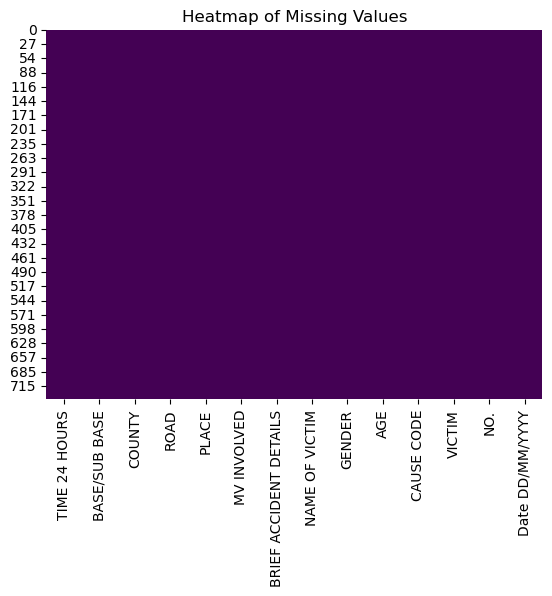

In [56]:
## using a heatmap to check for any null value

sns.heatmap(new_data.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()

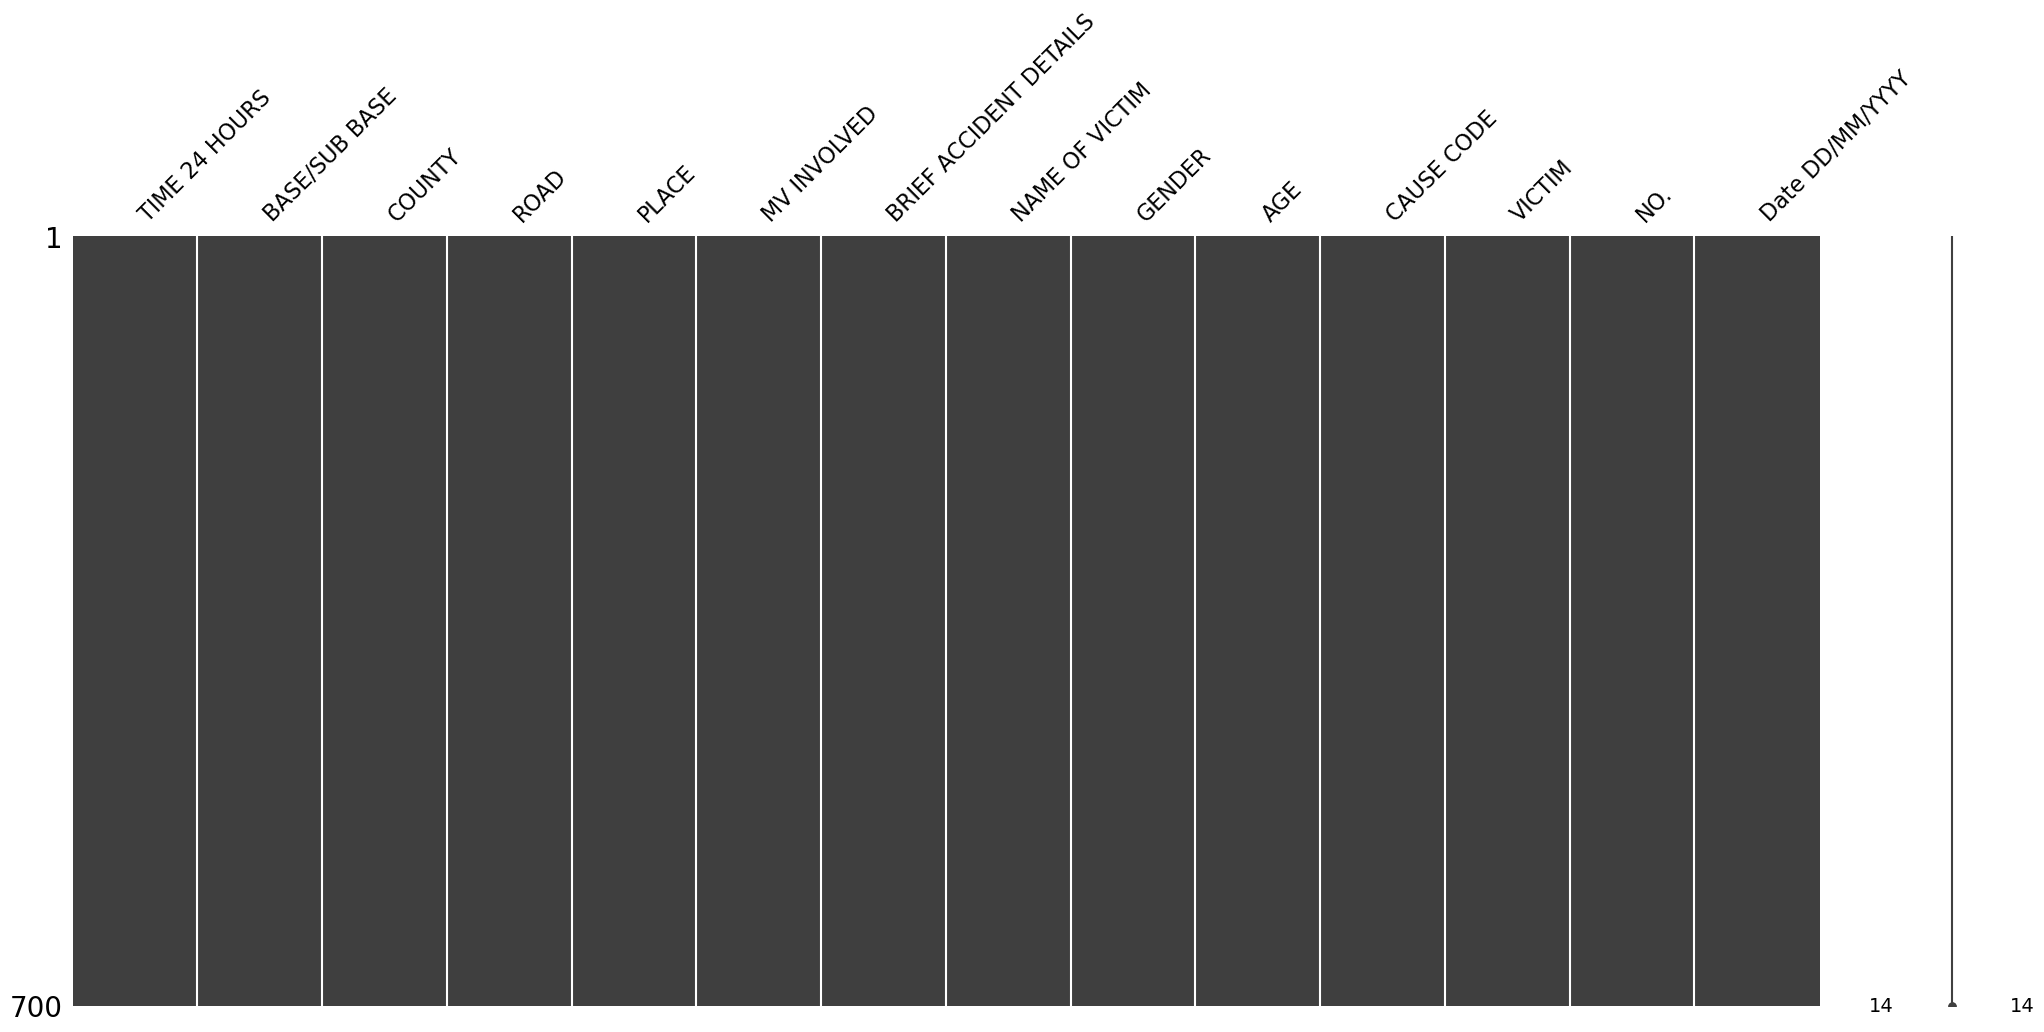

In [60]:
## Using Missingno to visualize missing values
msno.matrix(new_data)
plt.show()

2. Checking and Cleaning Duplicates

In [67]:
new_data.duplicated().sum() ## Appears lie there are no duplicates, but this could be misleading

0

In [71]:
## Using time and place to identify duplicates
df_no_duplicates= new_data.drop_duplicates(subset=['TIME 24 HOURS', 'PLACE'])


In [74]:
df_no_duplicates

,TIME 24 HOURS,BASE/SUB BASE,COUNTY,ROAD,PLACE,MV INVOLVED,BRIEF ACCIDENT DETAILS,NAME OF VICTIM,GENDER,AGE,CAUSE CODE,VICTIM,NO.,Date DD/MM/YYYY
0,745,KISUMU,KISUMU,NAIROBI-BUSIA,KASAGAM FLY OVER,KBS 163T/ZD 9531 AXIOR TRAILER,THE VEHICLE LOST CONTROL AND HIT BARRIER LANDI...,UNKNOWN,F,A,29.0,PASSENGER,1.0,2017-11-06
1,1430,NAROK,NAROK,NAROK-MAU,NAROK TOWN,KBS 518A HONDA CRV,THE VEHICLE KNOCKED DOWN THE VICTIM,UNKNOWN,M,80,68.0,PEDESTRIAN,1.0,2017-11-06
2,1515,LONDIANI,KERICHO,KERICHO-NAKURU,JUBERT AREA,KTCB 472K JOHN DEER,"THE VEHICLE LOST CONTROL,VEERING OFF THE ROAD ...",UNKNOWN,M,25,26.0,DRIVER,1.0,2017-11-06
3,1600,KIMILILI,BUNGOMA,BOKOLI-KIMILILI,BITUYU AREA,KBW 374M TOYOTA TOWNACE,THE VEHICLE KNOCKED DOWN THE VICTIM,UNKNOWN,M,31,7.0,PEDESTRIAN,1.0,2017-11-06
4,1747,NAKURU,NAKURU,PIPELINE ELEMENTAITA,PIPELINE AREA,KMDQ 433R DAYAN & KAR 843W,THE VEHICLE HIT THE MOTOR CYCLE,UNKNOWN,M,23,29.0,M/CYCLIST,1.0,2017-11-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,1730,KURIA,MIGORI,NTIMARU-KEHANCHA,TARANGANYA SHOPPING CENTRE,GK B 529 ISUZU DMAX & M/J/PED,THE VEHICLE KNOCKED DOWN A PEDESTRIAN,CHARLES MUNATI,M,J,36.0,PEDESTRIAN,1.0,2017-02-22
736,1930,SAGANA,KIRINYAGA,KENOL-MAKUTANO,WACHORO AREA,KBU 591M/ZF 5724 SCANIA & KMEA 508C TIGER,THE CYCLE HIT THE STATIONARY VEHICLE,UNKNOWN,M,A,37.0,RIDER AND P/PASSENGER,2.0,2017-02-22
737,2145,DTEO KASARANI,NAIROBI,THIKA RD,CAR WASH AREA,KCH 357W T/IST & M/A/PED,THE VEHICLE KNOCKED DOWN A PEDESTIRAN,COLLINS KIARIE,M,20,98.0,PEDESTRIAN,1.0,2017-02-22
738,2039,KANGUNDO,MAKUENI,NAIROBI-KANGUNDO,MAKENZIE AREA,KCC 374L HINO MINIBUS & KMCG 188U SKYGO,THE VEHICLE COLLIDED HEAD ON WITH THE M/CYCLE,BENARD MUTUNGA,M,36,82.0,RIDER,1.0,2017-02-22


In [81]:
## Resetting index 
acc_data = df_no_duplicates.reset_index(drop= True)

In [83]:
acc_data

,TIME 24 HOURS,BASE/SUB BASE,COUNTY,ROAD,PLACE,MV INVOLVED,BRIEF ACCIDENT DETAILS,NAME OF VICTIM,GENDER,AGE,CAUSE CODE,VICTIM,NO.,Date DD/MM/YYYY
0,745,KISUMU,KISUMU,NAIROBI-BUSIA,KASAGAM FLY OVER,KBS 163T/ZD 9531 AXIOR TRAILER,THE VEHICLE LOST CONTROL AND HIT BARRIER LANDI...,UNKNOWN,F,A,29.0,PASSENGER,1.0,2017-11-06
1,1430,NAROK,NAROK,NAROK-MAU,NAROK TOWN,KBS 518A HONDA CRV,THE VEHICLE KNOCKED DOWN THE VICTIM,UNKNOWN,M,80,68.0,PEDESTRIAN,1.0,2017-11-06
2,1515,LONDIANI,KERICHO,KERICHO-NAKURU,JUBERT AREA,KTCB 472K JOHN DEER,"THE VEHICLE LOST CONTROL,VEERING OFF THE ROAD ...",UNKNOWN,M,25,26.0,DRIVER,1.0,2017-11-06
3,1600,KIMILILI,BUNGOMA,BOKOLI-KIMILILI,BITUYU AREA,KBW 374M TOYOTA TOWNACE,THE VEHICLE KNOCKED DOWN THE VICTIM,UNKNOWN,M,31,7.0,PEDESTRIAN,1.0,2017-11-06
4,1747,NAKURU,NAKURU,PIPELINE ELEMENTAITA,PIPELINE AREA,KMDQ 433R DAYAN & KAR 843W,THE VEHICLE HIT THE MOTOR CYCLE,UNKNOWN,M,23,29.0,M/CYCLIST,1.0,2017-11-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,1730,KURIA,MIGORI,NTIMARU-KEHANCHA,TARANGANYA SHOPPING CENTRE,GK B 529 ISUZU DMAX & M/J/PED,THE VEHICLE KNOCKED DOWN A PEDESTRIAN,CHARLES MUNATI,M,J,36.0,PEDESTRIAN,1.0,2017-02-22
679,1930,SAGANA,KIRINYAGA,KENOL-MAKUTANO,WACHORO AREA,KBU 591M/ZF 5724 SCANIA & KMEA 508C TIGER,THE CYCLE HIT THE STATIONARY VEHICLE,UNKNOWN,M,A,37.0,RIDER AND P/PASSENGER,2.0,2017-02-22
680,2145,DTEO KASARANI,NAIROBI,THIKA RD,CAR WASH AREA,KCH 357W T/IST & M/A/PED,THE VEHICLE KNOCKED DOWN A PEDESTIRAN,COLLINS KIARIE,M,20,98.0,PEDESTRIAN,1.0,2017-02-22
681,2039,KANGUNDO,MAKUENI,NAIROBI-KANGUNDO,MAKENZIE AREA,KCC 374L HINO MINIBUS & KMCG 188U SKYGO,THE VEHICLE COLLIDED HEAD ON WITH THE M/CYCLE,BENARD MUTUNGA,M,36,82.0,RIDER,1.0,2017-02-22


3. Aligning Column names, for readability

In [85]:
## Changing all column case to proper
acc_data.columns = data.columns.str.title()

In [87]:
acc_data

,Time 24 Hours,Base/Sub Base,County,Road,Place,Mv Involved,Brief Accident Details,Name Of Victim,Gender,Age,Cause Code,Victim,No.,Date Dd/Mm/Yyyy
0,745,KISUMU,KISUMU,NAIROBI-BUSIA,KASAGAM FLY OVER,KBS 163T/ZD 9531 AXIOR TRAILER,THE VEHICLE LOST CONTROL AND HIT BARRIER LANDI...,UNKNOWN,F,A,29.0,PASSENGER,1.0,2017-11-06
1,1430,NAROK,NAROK,NAROK-MAU,NAROK TOWN,KBS 518A HONDA CRV,THE VEHICLE KNOCKED DOWN THE VICTIM,UNKNOWN,M,80,68.0,PEDESTRIAN,1.0,2017-11-06
2,1515,LONDIANI,KERICHO,KERICHO-NAKURU,JUBERT AREA,KTCB 472K JOHN DEER,"THE VEHICLE LOST CONTROL,VEERING OFF THE ROAD ...",UNKNOWN,M,25,26.0,DRIVER,1.0,2017-11-06
3,1600,KIMILILI,BUNGOMA,BOKOLI-KIMILILI,BITUYU AREA,KBW 374M TOYOTA TOWNACE,THE VEHICLE KNOCKED DOWN THE VICTIM,UNKNOWN,M,31,7.0,PEDESTRIAN,1.0,2017-11-06
4,1747,NAKURU,NAKURU,PIPELINE ELEMENTAITA,PIPELINE AREA,KMDQ 433R DAYAN & KAR 843W,THE VEHICLE HIT THE MOTOR CYCLE,UNKNOWN,M,23,29.0,M/CYCLIST,1.0,2017-11-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,1730,KURIA,MIGORI,NTIMARU-KEHANCHA,TARANGANYA SHOPPING CENTRE,GK B 529 ISUZU DMAX & M/J/PED,THE VEHICLE KNOCKED DOWN A PEDESTRIAN,CHARLES MUNATI,M,J,36.0,PEDESTRIAN,1.0,2017-02-22
679,1930,SAGANA,KIRINYAGA,KENOL-MAKUTANO,WACHORO AREA,KBU 591M/ZF 5724 SCANIA & KMEA 508C TIGER,THE CYCLE HIT THE STATIONARY VEHICLE,UNKNOWN,M,A,37.0,RIDER AND P/PASSENGER,2.0,2017-02-22
680,2145,DTEO KASARANI,NAIROBI,THIKA RD,CAR WASH AREA,KCH 357W T/IST & M/A/PED,THE VEHICLE KNOCKED DOWN A PEDESTIRAN,COLLINS KIARIE,M,20,98.0,PEDESTRIAN,1.0,2017-02-22
681,2039,KANGUNDO,MAKUENI,NAIROBI-KANGUNDO,MAKENZIE AREA,KCC 374L HINO MINIBUS & KMCG 188U SKYGO,THE VEHICLE COLLIDED HEAD ON WITH THE M/CYCLE,BENARD MUTUNGA,M,36,82.0,RIDER,1.0,2017-02-22


In [89]:
## Redefining column names

acc_data1 = acc_data.rename( columns = {'Time 24 Hours': 'Time', 'Base/Sub Base':'Patrol Base', 'Mv Involved': 'Vehicle/s',
                                        'Brief Accident Details': 'Accident Details', 'Date Dd/Mm/Yyyy': 'Date'})

In [91]:
acc_data1

,Time,Patrol Base,County,Road,Place,Vehicle/s,Accident Details,Name Of Victim,Gender,Age,Cause Code,Victim,No.,Date
0,745,KISUMU,KISUMU,NAIROBI-BUSIA,KASAGAM FLY OVER,KBS 163T/ZD 9531 AXIOR TRAILER,THE VEHICLE LOST CONTROL AND HIT BARRIER LANDI...,UNKNOWN,F,A,29.0,PASSENGER,1.0,2017-11-06
1,1430,NAROK,NAROK,NAROK-MAU,NAROK TOWN,KBS 518A HONDA CRV,THE VEHICLE KNOCKED DOWN THE VICTIM,UNKNOWN,M,80,68.0,PEDESTRIAN,1.0,2017-11-06
2,1515,LONDIANI,KERICHO,KERICHO-NAKURU,JUBERT AREA,KTCB 472K JOHN DEER,"THE VEHICLE LOST CONTROL,VEERING OFF THE ROAD ...",UNKNOWN,M,25,26.0,DRIVER,1.0,2017-11-06
3,1600,KIMILILI,BUNGOMA,BOKOLI-KIMILILI,BITUYU AREA,KBW 374M TOYOTA TOWNACE,THE VEHICLE KNOCKED DOWN THE VICTIM,UNKNOWN,M,31,7.0,PEDESTRIAN,1.0,2017-11-06
4,1747,NAKURU,NAKURU,PIPELINE ELEMENTAITA,PIPELINE AREA,KMDQ 433R DAYAN & KAR 843W,THE VEHICLE HIT THE MOTOR CYCLE,UNKNOWN,M,23,29.0,M/CYCLIST,1.0,2017-11-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,1730,KURIA,MIGORI,NTIMARU-KEHANCHA,TARANGANYA SHOPPING CENTRE,GK B 529 ISUZU DMAX & M/J/PED,THE VEHICLE KNOCKED DOWN A PEDESTRIAN,CHARLES MUNATI,M,J,36.0,PEDESTRIAN,1.0,2017-02-22
679,1930,SAGANA,KIRINYAGA,KENOL-MAKUTANO,WACHORO AREA,KBU 591M/ZF 5724 SCANIA & KMEA 508C TIGER,THE CYCLE HIT THE STATIONARY VEHICLE,UNKNOWN,M,A,37.0,RIDER AND P/PASSENGER,2.0,2017-02-22
680,2145,DTEO KASARANI,NAIROBI,THIKA RD,CAR WASH AREA,KCH 357W T/IST & M/A/PED,THE VEHICLE KNOCKED DOWN A PEDESTIRAN,COLLINS KIARIE,M,20,98.0,PEDESTRIAN,1.0,2017-02-22
681,2039,KANGUNDO,MAKUENI,NAIROBI-KANGUNDO,MAKENZIE AREA,KCC 374L HINO MINIBUS & KMCG 188U SKYGO,THE VEHICLE COLLIDED HEAD ON WITH THE M/CYCLE,BENARD MUTUNGA,M,36,82.0,RIDER,1.0,2017-02-22


In [95]:
## Dropping column

acc_data1 = acc_data1.drop(columns = 'Name Of Victim')

In [97]:
acc_data1

,Time,Patrol Base,County,Road,Place,Vehicle/s,Accident Details,Gender,Age,Cause Code,Victim,No.,Date
0,745,KISUMU,KISUMU,NAIROBI-BUSIA,KASAGAM FLY OVER,KBS 163T/ZD 9531 AXIOR TRAILER,THE VEHICLE LOST CONTROL AND HIT BARRIER LANDI...,F,A,29.0,PASSENGER,1.0,2017-11-06
1,1430,NAROK,NAROK,NAROK-MAU,NAROK TOWN,KBS 518A HONDA CRV,THE VEHICLE KNOCKED DOWN THE VICTIM,M,80,68.0,PEDESTRIAN,1.0,2017-11-06
2,1515,LONDIANI,KERICHO,KERICHO-NAKURU,JUBERT AREA,KTCB 472K JOHN DEER,"THE VEHICLE LOST CONTROL,VEERING OFF THE ROAD ...",M,25,26.0,DRIVER,1.0,2017-11-06
3,1600,KIMILILI,BUNGOMA,BOKOLI-KIMILILI,BITUYU AREA,KBW 374M TOYOTA TOWNACE,THE VEHICLE KNOCKED DOWN THE VICTIM,M,31,7.0,PEDESTRIAN,1.0,2017-11-06
4,1747,NAKURU,NAKURU,PIPELINE ELEMENTAITA,PIPELINE AREA,KMDQ 433R DAYAN & KAR 843W,THE VEHICLE HIT THE MOTOR CYCLE,M,23,29.0,M/CYCLIST,1.0,2017-11-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,1730,KURIA,MIGORI,NTIMARU-KEHANCHA,TARANGANYA SHOPPING CENTRE,GK B 529 ISUZU DMAX & M/J/PED,THE VEHICLE KNOCKED DOWN A PEDESTRIAN,M,J,36.0,PEDESTRIAN,1.0,2017-02-22
679,1930,SAGANA,KIRINYAGA,KENOL-MAKUTANO,WACHORO AREA,KBU 591M/ZF 5724 SCANIA & KMEA 508C TIGER,THE CYCLE HIT THE STATIONARY VEHICLE,M,A,37.0,RIDER AND P/PASSENGER,2.0,2017-02-22
680,2145,DTEO KASARANI,NAIROBI,THIKA RD,CAR WASH AREA,KCH 357W T/IST & M/A/PED,THE VEHICLE KNOCKED DOWN A PEDESTIRAN,M,20,98.0,PEDESTRIAN,1.0,2017-02-22
681,2039,KANGUNDO,MAKUENI,NAIROBI-KANGUNDO,MAKENZIE AREA,KCC 374L HINO MINIBUS & KMCG 188U SKYGO,THE VEHICLE COLLIDED HEAD ON WITH THE M/CYCLE,M,36,82.0,RIDER,1.0,2017-02-22


In [105]:
## Adding underscores to columns and stripping white space
acc_data1.columns = acc_data1.columns.str.replace(' ', '_').str.strip()

In [107]:
acc_data1

,Time,Patrol_Base,County,Road,Place,Vehicle/s,Accident_Details,Gender,Age,Cause_Code,Victim,No.,Date
0,745,KISUMU,KISUMU,NAIROBI-BUSIA,KASAGAM FLY OVER,KBS 163T/ZD 9531 AXIOR TRAILER,THE VEHICLE LOST CONTROL AND HIT BARRIER LANDI...,F,A,29.0,PASSENGER,1.0,2017-11-06
1,1430,NAROK,NAROK,NAROK-MAU,NAROK TOWN,KBS 518A HONDA CRV,THE VEHICLE KNOCKED DOWN THE VICTIM,M,80,68.0,PEDESTRIAN,1.0,2017-11-06
2,1515,LONDIANI,KERICHO,KERICHO-NAKURU,JUBERT AREA,KTCB 472K JOHN DEER,"THE VEHICLE LOST CONTROL,VEERING OFF THE ROAD ...",M,25,26.0,DRIVER,1.0,2017-11-06
3,1600,KIMILILI,BUNGOMA,BOKOLI-KIMILILI,BITUYU AREA,KBW 374M TOYOTA TOWNACE,THE VEHICLE KNOCKED DOWN THE VICTIM,M,31,7.0,PEDESTRIAN,1.0,2017-11-06
4,1747,NAKURU,NAKURU,PIPELINE ELEMENTAITA,PIPELINE AREA,KMDQ 433R DAYAN & KAR 843W,THE VEHICLE HIT THE MOTOR CYCLE,M,23,29.0,M/CYCLIST,1.0,2017-11-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,1730,KURIA,MIGORI,NTIMARU-KEHANCHA,TARANGANYA SHOPPING CENTRE,GK B 529 ISUZU DMAX & M/J/PED,THE VEHICLE KNOCKED DOWN A PEDESTRIAN,M,J,36.0,PEDESTRIAN,1.0,2017-02-22
679,1930,SAGANA,KIRINYAGA,KENOL-MAKUTANO,WACHORO AREA,KBU 591M/ZF 5724 SCANIA & KMEA 508C TIGER,THE CYCLE HIT THE STATIONARY VEHICLE,M,A,37.0,RIDER AND P/PASSENGER,2.0,2017-02-22
680,2145,DTEO KASARANI,NAIROBI,THIKA RD,CAR WASH AREA,KCH 357W T/IST & M/A/PED,THE VEHICLE KNOCKED DOWN A PEDESTIRAN,M,20,98.0,PEDESTRIAN,1.0,2017-02-22
681,2039,KANGUNDO,MAKUENI,NAIROBI-KANGUNDO,MAKENZIE AREA,KCC 374L HINO MINIBUS & KMCG 188U SKYGO,THE VEHICLE COLLIDED HEAD ON WITH THE M/CYCLE,M,36,82.0,RIDER,1.0,2017-02-22


In [111]:
## Changing Time variable to Datetime datatype

acc_data1['Time'] = pd.to_datetime(acc_data1['Time'], errors='coerce')

In [113]:
acc_data1['Time'].dtypes

dtype('<M8[ns]')

In [125]:
## Converting all string elements to proper case

acc_data1 = acc_data1.apply(lambda x: x.str.title() if x.dtype == 'object' else x)


In [127]:
acc_data1

,Time,Patrol_Base,County,Road,Place,Vehicle/s,Accident_Details,Gender,Age,Cause_Code,Victim,No.,Date
0,1970-01-01 00:00:00.000000745,Kisumu,Kisumu,Nairobi-Busia,Kasagam Fly Over,Kbs 163T/Zd 9531 Axior Trailer,The Vehicle Lost Control And Hit Barrier Landi...,F,A,29.0,Passenger,1.0,2017-11-06
1,1970-01-01 00:00:00.000001430,Narok,Narok,Narok-Mau,Narok Town,Kbs 518A Honda Crv,The Vehicle Knocked Down The Victim,M,NaN,68.0,Pedestrian,1.0,2017-11-06
2,1970-01-01 00:00:00.000001515,Londiani,Kericho,Kericho-Nakuru,Jubert Area,Ktcb 472K John Deer,"The Vehicle Lost Control,Veering Off The Road ...",M,NaN,26.0,Driver,1.0,2017-11-06
3,1970-01-01 00:00:00.000001600,Kimilili,Bungoma,Bokoli-Kimilili,Bituyu Area,Kbw 374M Toyota Townace,The Vehicle Knocked Down The Victim,M,NaN,7.0,Pedestrian,1.0,2017-11-06
4,1970-01-01 00:00:00.000001747,Nakuru,Nakuru,Pipeline Elementaita,Pipeline Area,Kmdq 433R Dayan & Kar 843W,The Vehicle Hit The Motor Cycle,M,NaN,29.0,M/Cyclist,1.0,2017-11-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,1970-01-01 00:00:00.000001730,Kuria,Migori,Ntimaru-Kehancha,Taranganya Shopping Centre,Gk B 529 Isuzu Dmax & M/J/Ped,The Vehicle Knocked Down A Pedestrian,M,J,36.0,Pedestrian,1.0,2017-02-22
679,1970-01-01 00:00:00.000001930,Sagana,Kirinyaga,Kenol-Makutano,Wachoro Area,Kbu 591M/Zf 5724 Scania & Kmea 508C Tiger,The Cycle Hit The Stationary Vehicle,M,A,37.0,Rider And P/Passenger,2.0,2017-02-22
680,1970-01-01 00:00:00.000002145,Dteo Kasarani,Nairobi,Thika Rd,Car Wash Area,Kch 357W T/Ist & M/A/Ped,The Vehicle Knocked Down A Pedestiran,M,NaN,98.0,Pedestrian,1.0,2017-02-22
681,1970-01-01 00:00:00.000002039,Kangundo,Makueni,Nairobi-Kangundo,Makenzie Area,Kcc 374L Hino Minibus & Kmcg 188U Skygo,The Vehicle Collided Head On With The M/Cycle,M,NaN,82.0,Rider,1.0,2017-02-22


In [143]:
acc_data1.drop(columns = ['Age'])

,Time,Patrol_Base,County,Road,Place,Vehicle/s,Accident_Details,Gender,Cause_Code,Victim,No.,Date
0,00:00:00,Kisumu,Kisumu,Nairobi-Busia,Kasagam Fly Over,Kbs 163T/Zd 9531 Axior Trailer,The Vehicle Lost Control And Hit Barrier Landi...,F,29.0,Passenger,1.0,2017-11-06
1,00:00:00,Narok,Narok,Narok-Mau,Narok Town,Kbs 518A Honda Crv,The Vehicle Knocked Down The Victim,M,68.0,Pedestrian,1.0,2017-11-06
2,00:00:00,Londiani,Kericho,Kericho-Nakuru,Jubert Area,Ktcb 472K John Deer,"The Vehicle Lost Control,Veering Off The Road ...",M,26.0,Driver,1.0,2017-11-06
3,00:00:00,Kimilili,Bungoma,Bokoli-Kimilili,Bituyu Area,Kbw 374M Toyota Townace,The Vehicle Knocked Down The Victim,M,7.0,Pedestrian,1.0,2017-11-06
4,00:00:00,Nakuru,Nakuru,Pipeline Elementaita,Pipeline Area,Kmdq 433R Dayan & Kar 843W,The Vehicle Hit The Motor Cycle,M,29.0,M/Cyclist,1.0,2017-11-06
...,...,...,...,...,...,...,...,...,...,...,...,...
678,00:00:00,Kuria,Migori,Ntimaru-Kehancha,Taranganya Shopping Centre,Gk B 529 Isuzu Dmax & M/J/Ped,The Vehicle Knocked Down A Pedestrian,M,36.0,Pedestrian,1.0,2017-02-22
679,00:00:00,Sagana,Kirinyaga,Kenol-Makutano,Wachoro Area,Kbu 591M/Zf 5724 Scania & Kmea 508C Tiger,The Cycle Hit The Stationary Vehicle,M,37.0,Rider And P/Passenger,2.0,2017-02-22
680,00:00:00,Dteo Kasarani,Nairobi,Thika Rd,Car Wash Area,Kch 357W T/Ist & M/A/Ped,The Vehicle Knocked Down A Pedestiran,M,98.0,Pedestrian,1.0,2017-02-22
681,00:00:00,Kangundo,Makueni,Nairobi-Kangundo,Makenzie Area,Kcc 374L Hino Minibus & Kmcg 188U Skygo,The Vehicle Collided Head On With The M/Cycle,M,82.0,Rider,1.0,2017-02-22


In [159]:
acc_data1['Cause_Code'] = acc_data1['Cause_Code'].astype(int).round(0)

In [163]:
acc_data1.drop(columns = ['Time'], inplace = True)

In [180]:
acc_data1

,Patrol_Base,County,Road,Place,Vehicle/s,Accident_Details,Gender,Cause_Code,Victim,Date
0,Kisumu,Kisumu,Nairobi-Busia,Kasagam Fly Over,Kbs 163T/Zd 9531 Axior Trailer,The Vehicle Lost Control And Hit Barrier Landi...,F,29,Passenger,2017-11-06
1,Narok,Narok,Narok-Mau,Narok Town,Kbs 518A Honda Crv,The Vehicle Knocked Down The Victim,M,68,Pedestrian,2017-11-06
2,Londiani,Kericho,Kericho-Nakuru,Jubert Area,Ktcb 472K John Deer,"The Vehicle Lost Control,Veering Off The Road ...",M,26,Driver,2017-11-06
3,Kimilili,Bungoma,Bokoli-Kimilili,Bituyu Area,Kbw 374M Toyota Townace,The Vehicle Knocked Down The Victim,M,7,Pedestrian,2017-11-06
4,Nakuru,Nakuru,Pipeline Elementaita,Pipeline Area,Kmdq 433R Dayan & Kar 843W,The Vehicle Hit The Motor Cycle,M,29,M/Cyclist,2017-11-06
...,...,...,...,...,...,...,...,...,...,...
678,Kuria,Migori,Ntimaru-Kehancha,Taranganya Shopping Centre,Gk B 529 Isuzu Dmax & M/J/Ped,The Vehicle Knocked Down A Pedestrian,M,36,Pedestrian,2017-02-22
679,Sagana,Kirinyaga,Kenol-Makutano,Wachoro Area,Kbu 591M/Zf 5724 Scania & Kmea 508C Tiger,The Cycle Hit The Stationary Vehicle,M,37,Rider And P/Passenger,2017-02-22
680,Dteo Kasarani,Nairobi,Thika Rd,Car Wash Area,Kch 357W T/Ist & M/A/Ped,The Vehicle Knocked Down A Pedestiran,M,98,Pedestrian,2017-02-22
681,Kangundo,Makueni,Nairobi-Kangundo,Makenzie Area,Kcc 374L Hino Minibus & Kmcg 188U Skygo,The Vehicle Collided Head On With The M/Cycle,M,82,Rider,2017-02-22


In [182]:
acc_data1.shape

(683, 10)

Dataset Prepared and ready for Analysis